In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import matplotlib.pylab as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
sns.set_style("whitegrid")

In [2]:
df=pd.read_csv("train.csv",index_col="Id")

In [3]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
nan=df.isna().sum().to_frame(name="nan").query("nan != 0").sort_values("nan",ascending=False)
nan

,nan
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


In [6]:
df.drop(nan.index[0:5],inplace=True,axis=1)

## categorical features selection

- using annova analysis

In [7]:
categorical=df.select_dtypes(include="object").columns

In [8]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df_test=df.copy()
for i in categorical:
    df_test[i]=l.fit_transform(df_test[i])

In [9]:
from sklearn.feature_selection import f_classif,SelectKBest
selector=SelectKBest(f_classif,10)

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass k=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



In [10]:
selector.fit(df_test[categorical],df_test["SalePrice"])

SelectKBest()

In [11]:
scores=selector.scores_
scores

array([1.7427707 , 1.8707452 , 1.4040654 , 1.0793148 , 0.23979595,
       0.9605189 , 1.1951228 , 1.2504798 , 0.77774525, 1.5368966 ,
       1.0230167 , 1.0396866 , 1.1735922 , 1.0687842 , 0.981239  ,
       1.0138425 , 1.4037845 , 3.7749186 , 0.86962295, 1.4988452 ,
       3.073768  , 1.0385568 , 1.4348481 , 1.0227247 , 0.9025586 ,
       1.4797171 , 1.2876581 , 1.5722778 , 1.1444325 , 2.9047406 ,
       0.8039906 , 1.63967   , 2.3636937 , 0.89718515, 0.77955884,
       1.1169975 , 0.80505055, 0.99841505], dtype=float32)

In [12]:
f_value=pd.Series(scores,index=categorical).sort_values(ascending=False)
selector.get_support(indices=True)

array([ 0,  1,  9, 17, 19, 20, 27, 29, 31, 32], dtype=int64)

In [13]:
f_value.head(5)

ExterQual       3.774919
BsmtQual        3.073768
KitchenQual     2.904741
GarageFinish    2.363694
Street          1.870745
dtype: float32

In [14]:
px.bar(x=f_value.index,y=f_value.values,labels={"y":"The Score","x":"the column"},
      title="F_values of Categorical Features")

### using another method ( kandell's ranke coefficient )

In [15]:
from scipy.stats import kendalltau

In [16]:
coefs,ps=[],[]
for i in categorical:
    coef,p=kendalltau(df_test[i],df_test["SalePrice"])
    coefs.append(coef)
    ps.append(p)
# we accept that there is diffrence happen to the target variable towards the feature if p< .05
# the accepted colleration are
p_valus=pd.Series(ps,index=categorical)
accepted=p_valus[p_valus <.05].sort_values(ascending=True)
accepted.head(5)

GarageFinish    1.665734e-140
ExterQual       3.207225e-136
BsmtQual        1.107474e-128
KitchenQual     9.206983e-114
GarageType       2.125441e-87
dtype: float64

### get the common rows between these two ranking method for more confidence

In [17]:
inter=set(accepted.index).intersection(f_value.index)

In [18]:
px.bar(x=[*inter],y=f_value.loc[[*inter]],labels={"x":"the columns","y":"F_valus"},
      title="columns that accept the correlation and it's F_value")

##### so , we have 11 columns that are the best according to ( ANOVA f_value score and kendell's ranke score )

In [19]:
new_catecorigal=[*inter]

In [20]:
s=df[new_catecorigal].nunique()
final_cats_cols=s[s<10].index


In [21]:
final_cats_cols

Index(['KitchenQual', 'BldgType', 'Heating', 'Condition1', 'SaleCondition',
       'LotShape', 'RoofMatl', 'MasVnrType', 'PavedDrive', 'BsmtQual',
       'BsmtFinType1', 'ExterCond', 'GarageType', 'Foundation', 'Functional',
       'LotConfig', 'HeatingQC', 'GarageQual', 'ExterQual', 'GarageFinish',
       'BsmtCond', 'RoofStyle', 'BsmtExposure', 'MSZoning', 'CentralAir',
       'SaleType', 'Condition2', 'HouseStyle', 'Electrical', 'GarageCond'],
      dtype='object')

## numerical features selection

In [22]:
numerical=df.select_dtypes(exclude="object").drop("SalePrice",axis=1).columns

In [23]:
df[numerical].corr() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706


In [24]:
# get the best collerations with the target varialbe
# selcting acording the pearson colleration coefficient using no.corrcoef
from sklearn.impute import SimpleImputer
s=SimpleImputer(strategy="median")
P_coefs=[]
for i in numerical:
    P_coefs.append(np.corrcoef(df[i].fillna(df[i].median()),df["SalePrice"])[0,1])
p_valus=pd.Series(P_coefs,index=numerical)

In [25]:
p_valus.head(5)

MSSubClass    -0.084284
LotFrontage    0.334771
LotArea        0.263843
OverallQual    0.790982
OverallCond   -0.077856
dtype: float64

In [26]:
# the high correlated values are  >.5 or <.-5
p_valus=p_valus[abs(p_valus)>.5]
p_valus

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
dtype: float64

In [27]:
# another method
pers=[]
from scipy.stats import pearsonr
for i in numerical:
    corr, _ =pearsonr(df[i].fillna(df[i].median()),df["SalePrice"])
    pers.append(corr)
pearsonrs=pd.Series(pers,index=numerical)


In [28]:
px.bar(x=pearsonrs.index,y=pearsonrs.values,labels={"x":"the column","y":"the P_coef"},
      title="Pearson coef of Numeric Features")

In [29]:
pearsonrs=pearsonrs[abs(pearsonrs)>.5]
pearsonrs

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
dtype: float64

In [30]:
p_valus.index == pearsonrs.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [31]:
new_numerical=pearsonrs.index

<AxesSubplot:>

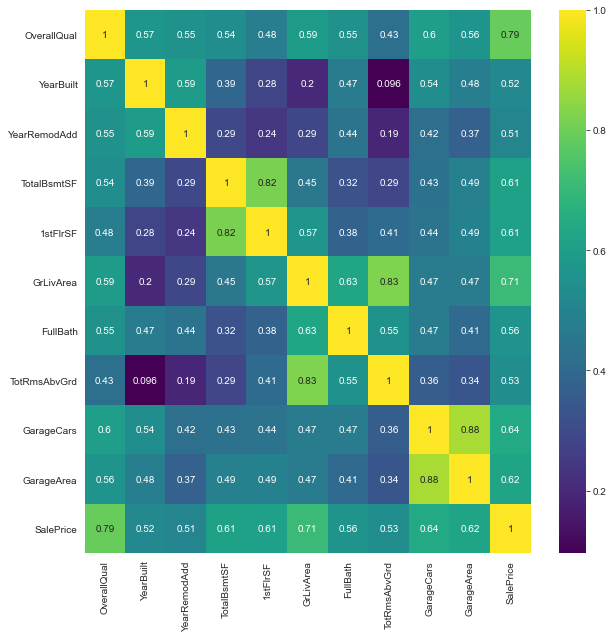

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df[[*new_numerical,"SalePrice"]].corr(),annot=True,cmap='viridis')

- form the heatmap:-
   - there is some features that has very strog ralation between each other,so, they will provid
     the same information and cause bias.
- the [ GarageCars and GarageArea ] are highly correlated so i choose the ' GarageCars' the has the highest coeffient with the target variables.
- with the same logic i will drop:
    - GarageArea
    - TotRmsAbvGrd
    - 1stFlrSf

In [37]:
# the cols i will drop
droped_cols=["GarageArea","TotRmsAbvGrd","stFlrSf"]

In [38]:
# the final numerical columns
final_numeric_cols=set(new_numerical)-set(droped_cols)
final_numeric_cols

{'1stFlrSF',
 'FullBath',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

### i will try to fill the NAN if cat_data with "No" as they provid information of not having what the column say

In [68]:
final_cols = [*final_cats_cols,*final_numeric_cols]
x=df[final_cols]
y=df["SalePrice"]
x.columns

Index(['KitchenQual', 'BldgType', 'Heating', 'Condition1', 'SaleCondition',
       'LotShape', 'RoofMatl', 'MasVnrType', 'PavedDrive', 'BsmtQual',
       'BsmtFinType1', 'ExterCond', 'GarageType', 'Foundation', 'Functional',
       'LotConfig', 'HeatingQC', 'GarageQual', 'ExterQual', 'GarageFinish',
       'BsmtCond', 'RoofStyle', 'BsmtExposure', 'MSZoning', 'CentralAir',
       'SaleType', 'Condition2', 'HouseStyle', 'Electrical', 'GarageCond',
       '1stFlrSF', 'TotalBsmtSF', 'YearBuilt', 'OverallQual', 'GrLivArea',
       'GarageCars', 'FullBath', 'YearRemodAdd'],
      dtype='object')

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,random_state=0,test_size=.2)

In [70]:
x_test=pd.read_csv("test.csv")

In [71]:

x_train = x_train[final_cols]
x_valid = x_valid[final_cols]
x_train, x_valid = x_train.align(x_valid, join='left', axis=1)
x_train, x_test = x_train.align(x_test, join='left', axis=1)
x_train.columns

Index(['KitchenQual', 'BldgType', 'Heating', 'Condition1', 'SaleCondition',
       'LotShape', 'RoofMatl', 'MasVnrType', 'PavedDrive', 'BsmtQual',
       'BsmtFinType1', 'ExterCond', 'GarageType', 'Foundation', 'Functional',
       'LotConfig', 'HeatingQC', 'GarageQual', 'ExterQual', 'GarageFinish',
       'BsmtCond', 'RoofStyle', 'BsmtExposure', 'MSZoning', 'CentralAir',
       'SaleType', 'Condition2', 'HouseStyle', 'Electrical', 'GarageCond',
       '1stFlrSF', 'TotalBsmtSF', 'YearBuilt', 'OverallQual', 'GrLivArea',
       'GarageCars', 'FullBath', 'YearRemodAdd'],
      dtype='object')

In [81]:
categorical_features=df.select_dtypes(include="object")[final_cats_cols].columns
numeric_features=df.select_dtypes(exclude="object")[final_numeric_cols].columns

In [82]:
# make a function that load the date and preproces it 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
categorical_transformer=Pipeline(steps=[
    ("missin",SimpleImputer(strategy="constant")),
    ("oh",OneHotEncoder(handle_unknown="ignore"))
])
numerical_transformer=SimpleImputer(strategy="median")
preprossor=ColumnTransformer(transformers=[
    ("num",numerical_transformer,numeric_features),
    ("cat",categorical_transformer,categorical_features)
])

#### fit all the data with the new features

In [91]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge,Lasso

from sklearn.metrics import mean_squared_error,r2_score

In [92]:
# m=XGBRegressor(n_estimators=1000,learning_rate=.05,n_jobs=4,random_state=0)
m=Lasso()

In [93]:
model=Pipeline(steps=[
    ("preprosess",preprossor),
    ("model",m)
])

In [94]:
model.fit(x_train,y_train)

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 48747178694.07965, tolerance: 719132949.923008



Pipeline(steps=[('preprosess',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['1stFlrSF', 'TotalBsmtSF', 'YearBuilt', 'OverallQual', 'GrLivArea',
       'GarageCars', 'FullBath', 'YearRemodAdd'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('missin',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('oh',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Inde...
       'LotShape', 'RoofMatl', 'MasVnrType', 'PavedDrive', 'BsmtQual',
       'BsmtFinType1', 'ExterCond', 'GarageType', 'Foundation', 'Functional',
 

In [95]:
y_pred=model.predict(x_valid)

In [96]:
np.sqrt(mean_squared_error(y_pred,y_valid))

54908.08542341134

In [80]:
X = pd.read_csv('train.csv', index_col='Id')
X_test_full = pd.read_csv('test.csv', index_col='Id')
# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()
#One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)


In [211]:
my_model_2 = XGBRegressor(n_estimators=1000,learning_rate=.05)
# Fit the model
my_model_2.fit(X_valid,y_valid)

# Get predictions
predictions_2 =my_model_2.predict(X_valid)
# Calculate MAE
mae_2 = np.sqrt(mean_squared_error(predictions_2,y_valid))

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)

Mean Absolute Error: 1.885738858692473
